# Assignment 1 Elijah Campbell-Ihim

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

### Data Preprocessing

In [149]:
#Read file
wireDF = pd.read_excel('Wire_bond.xlsx', usecols = [1, 2, 3, 4, 5, 6, 7])

#Set row names to correct names
wireDF.columns = wireDF.iloc[0]

#remove the first row afterwards
wireDF = wireDF[1:]

#wireDF['x1'] = wireDF['x1'].astype(float)
#wireDF['x2'] = wireDF['x2'].astype(float)
#wireDF['x3'] = wireDF['x3'].astype(float)
#wireDF['x4'] = wireDF['x4'].astype(float)
#wireDF['x5'] = wireDF['x5'].astype(float)
#wireDF['x6'] = wireDF['x6'].astype(float)
#wireDF.rename(columns={'y': 'pull_strength', 'x1': 'pull_strength', 'x2': 'die_height', 'x3': 'post_height', 
#                 'x4': 'wire_length', 'x5': 'bond_width_on_die', 'x6': 'bond_width'}, inplace=True)

wireDF.reset_index(drop = True, inplace = True)

wireDF.rename(columns = {col: col.replace(' ', '_') for col in wireDF.columns}, inplace = True)
wireDF.rename(columns = {"wire_lenghth": "wire_length"}, inplace = True)
wireDF = wireDF.astype(float)

wireDF.info()
wireDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pull_strength           22 non-null     float64
 1   die_height              22 non-null     float64
 2   post_height             22 non-null     float64
 3   loop_height             22 non-null     float64
 4   wire_length             22 non-null     float64
 5   bond_width_on_the_die   22 non-null     float64
 6   bond_width_on_the_post  22 non-null     float64
dtypes: float64(7)
memory usage: 1.3 KB


,pull_strength,die_height,post_height,loop_height,wire_length,bond_width_on_the_die,bond_width_on_the_post
0,8.0,5.2,17.0,28.6,83.0,1.9,1.6
1,8.0,5.2,19.6,29.6,94.9,2.1,2.3
2,8.3,5.8,19.8,32.4,89.7,2.1,1.8
3,8.5,6.4,19.6,31.0,96.2,2.0,2.0
4,8.8,5.8,19.4,32.4,95.6,2.2,2.1


In [150]:
#Check for null values
print("Number of null vals: ", df.isnull().sum())

Number of null vals:  observation    1
y              0
×1             0
x2             0
x3             0
x4             0
x5             0
×6             0
dtype: int64


In [151]:
wireDF.describe()

,pull_strength,die_height,post_height,loop_height,wire_length,bond_width_on_the_die,bond_width_on_the_post
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,10.227273,6.995455,19.340909,32.190909,88.631818,2.086364,1.945455
std,1.490664,3.777184,1.066663,1.803148,4.759190,0.112527,0.192050
min,8.000000,5.200000,17.000000,28.600000,83.000000,1.900000,1.600000
25%,9.075000,5.600000,18.800000,31.500000,84.675000,2.000000,1.800000
50%,10.150000,5.900000,19.500000,32.400000,87.000000,2.100000,1.900000
75%,11.450000,6.200000,20.125000,33.050000,93.475000,2.100000,2.100000
max,12.500000,18.600000,20.800000,35.400000,96.200000,2.300000,2.300000


## Plot the Data to get a visualization

C:\Users\Badle\MLClass\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


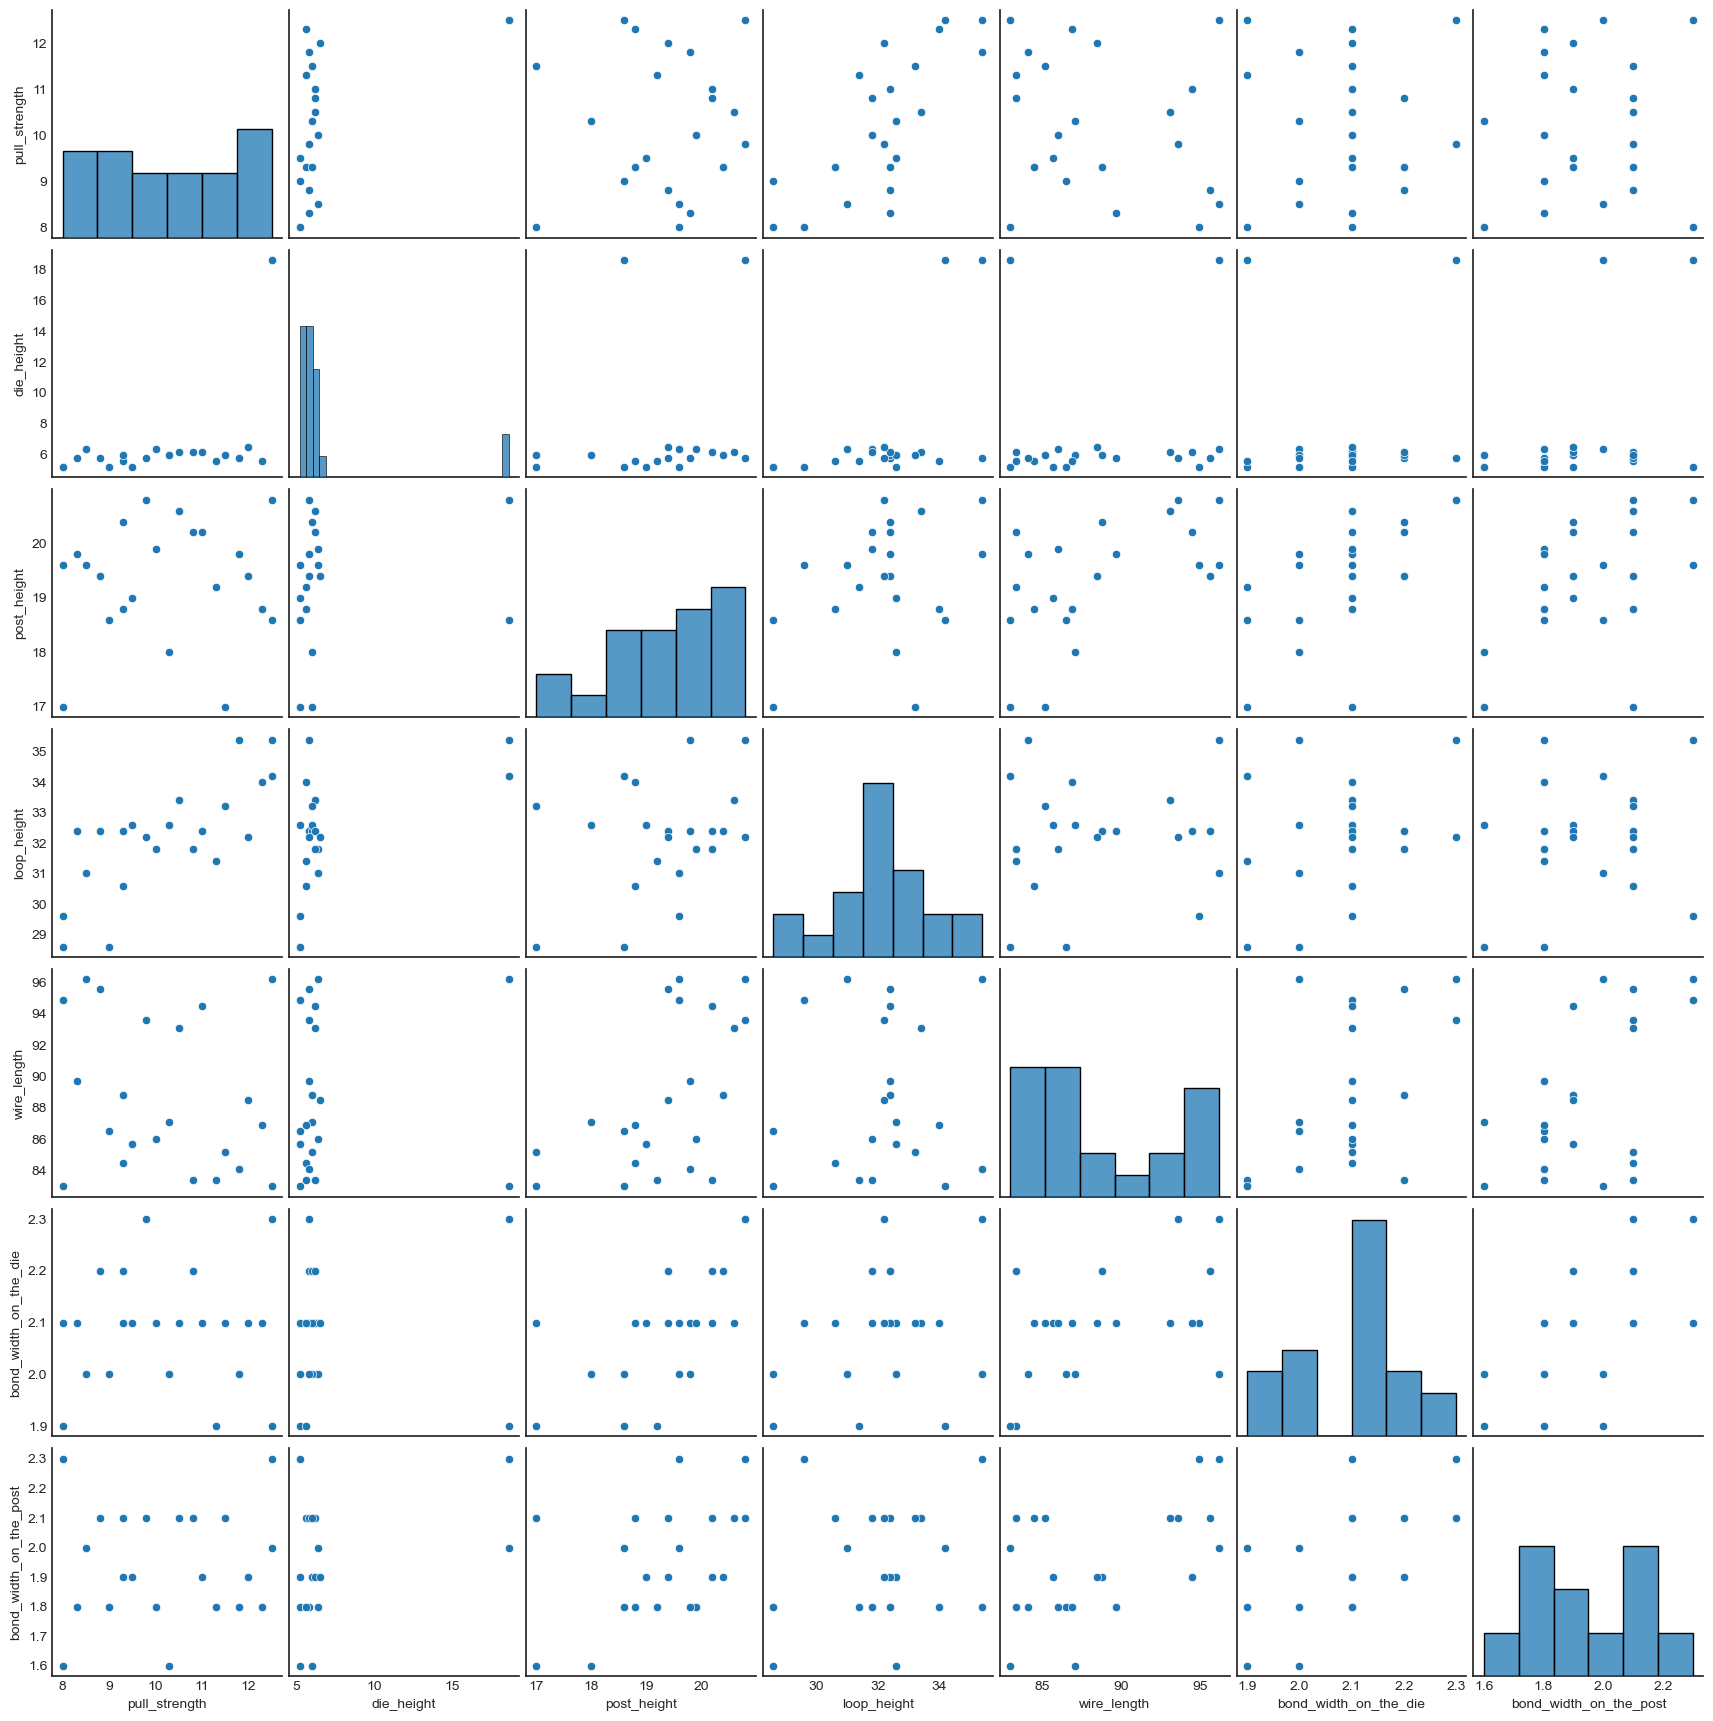

In [152]:
sn.pairplot(wireDF)

C:\Users\Badle\MLClass\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


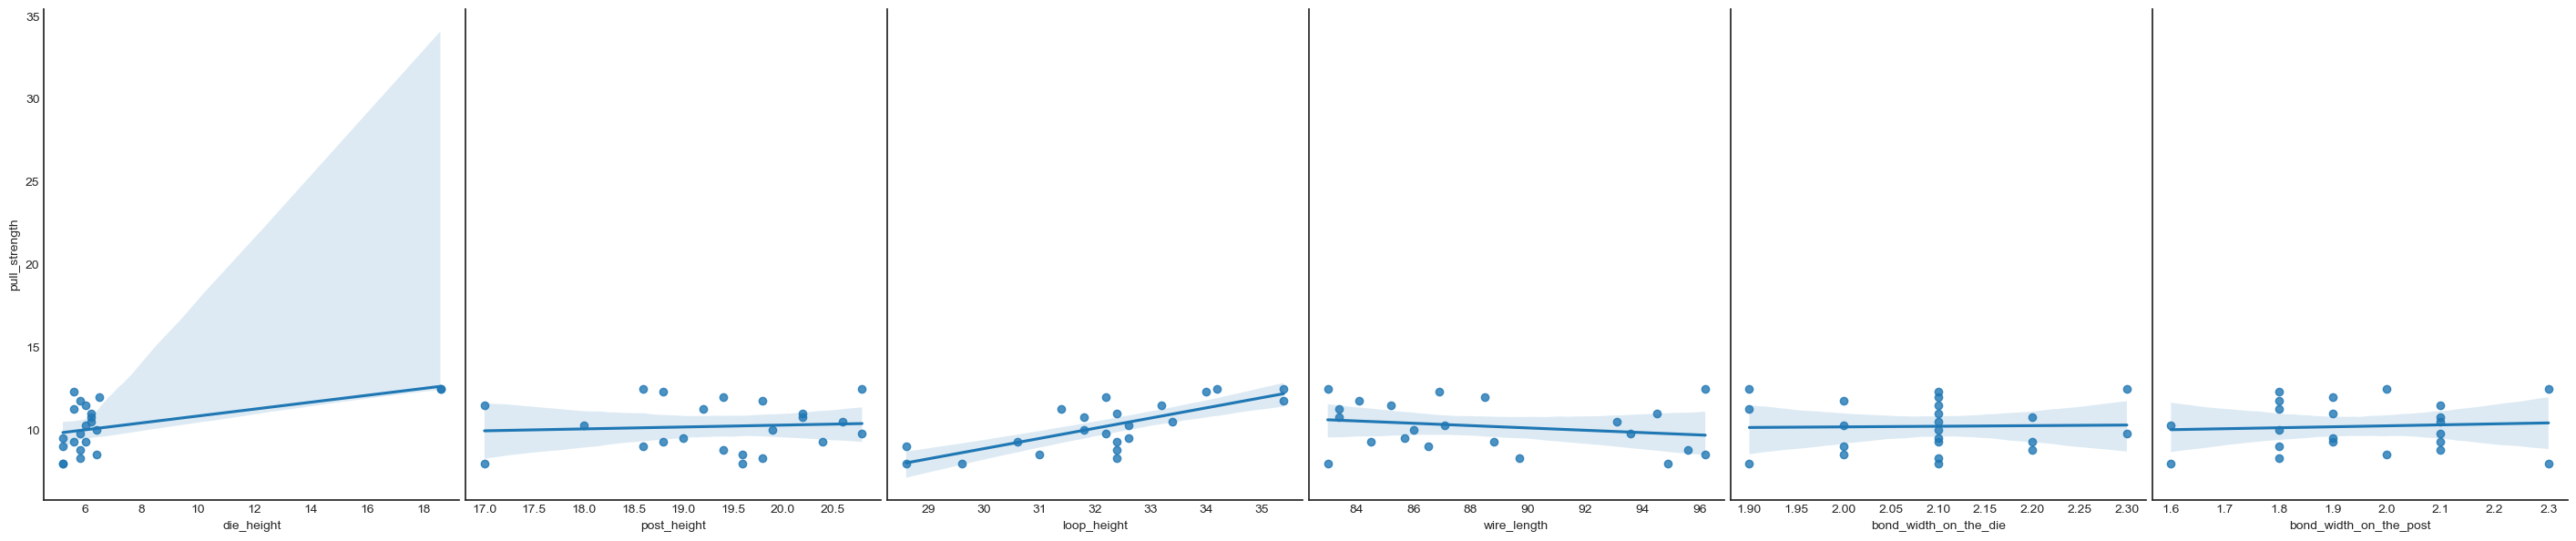

In [153]:
sn.pairplot(data=wireDF,
             x_vars=['die_height', 'post_height', 'loop_height', 'wire_length', 'bond_width_on_the_die', 'bond_width_on_the_post'],
             y_vars=['pull_strength'],
             height=6,
             aspect=0.8,
             kind='reg')

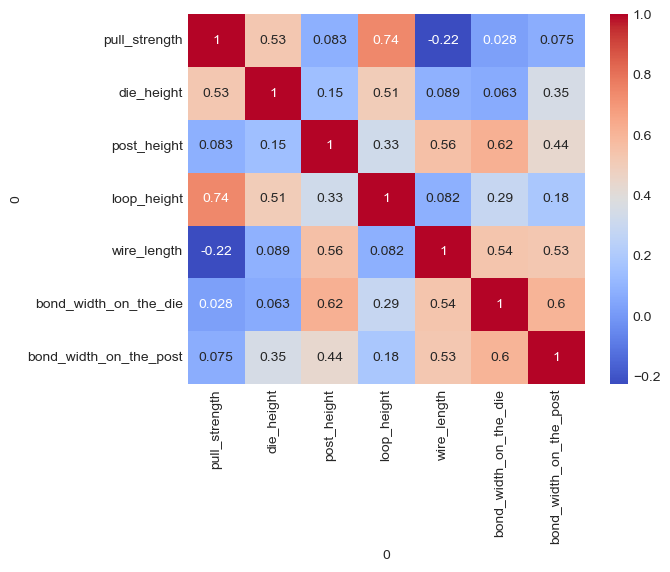

In [154]:
corrMatrix = wireDF.corr()
sn.heatmap(corrMatrix, annot = True, cmap = "coolwarm")
plt.show()

## Implement the Linear Model

In [155]:
#Use a linear regression model with Odinary Least Squares to fit data
lm = smf.ols(formula = 'pull_strength ~ die_height + post_height + loop_height + wire_length + bond_width_on_the_die + bond_width_on_the_post', data = wireDF)

#Train the modeland store the result
lm_learned = lm.fit()

#Get coefficients of learned model
lm_learned.params


Intercept                 0.673675
die_height                0.072295
post_height               0.022565
loop_height               0.560223
wire_length              -0.097798
bond_width_on_the_die    -1.021704
bond_width_on_the_post    0.707833
dtype: float64

In [156]:
lm = smf.ols(formula = 'pull_strength ~ die_height + post_height + loop_height + wire_length + bond_width_on_the_die + bond_width_on_the_post', data = wireDF).fit(params = lm_learned.params)

In [157]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          pull_strength   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     5.244
Date:                Tue, 26 Sep 2023   Prob (F-statistic):            0.00430
Time:                        13:12:30   Log-Likelihood:                -27.051
No. Observations:                  22   AIC:                             68.10
Df Residuals:                      15   BIC:                             75.74
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [158]:
#Get a 95% confidence interval
lm.conf_int(.05)

,0,1
Intercept,-11.883244,13.230595
die_height,-0.088842,0.233431
post_height,-0.587462,0.632592
loop_height,0.228599,0.891846
wire_length,-0.228725,0.033129
bond_width_on_the_die,-7.460726,5.417317
bond_width_on_the_post,-2.839084,4.254750


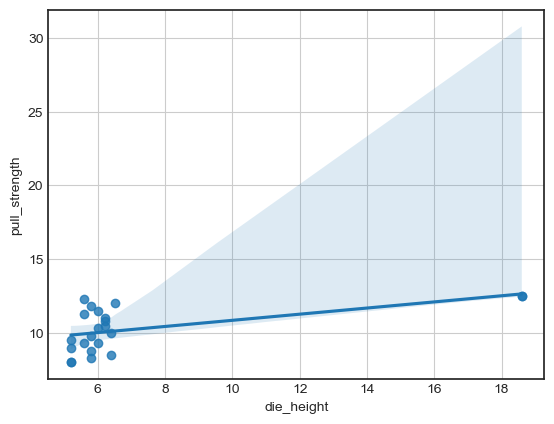

In [159]:
#Plot the results
sn.regplot(x = wireDF.die_height, y = wireDF.pull_strength)
plt.grid()

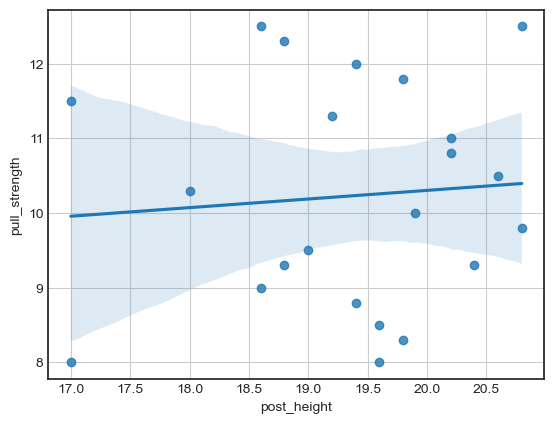

In [160]:
sn.regplot(x = wireDF.post_height, y = wireDF.pull_strength)
plt.grid()

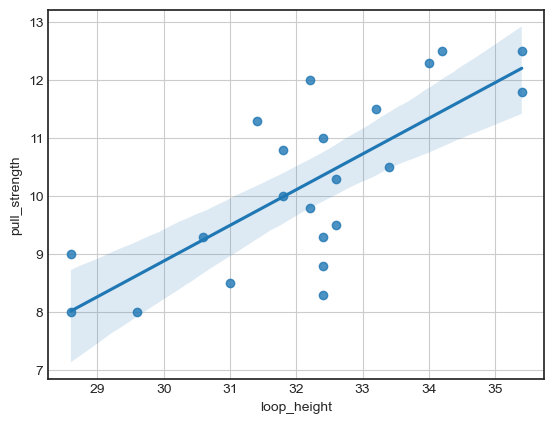

In [161]:
sn.regplot(x = wireDF.loop_height, y = wireDF.pull_strength)
plt.grid()

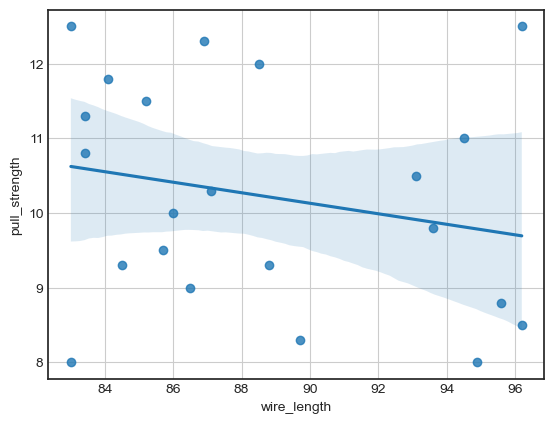

In [162]:
sn.regplot(x = wireDF.wire_length, y = wireDF.pull_strength)
plt.grid()

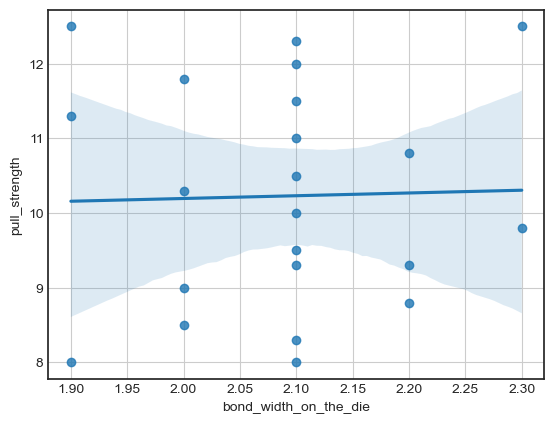

In [163]:
sn.regplot(x = wireDF.bond_width_on_the_die, y = wireDF.pull_strength)
plt.grid()

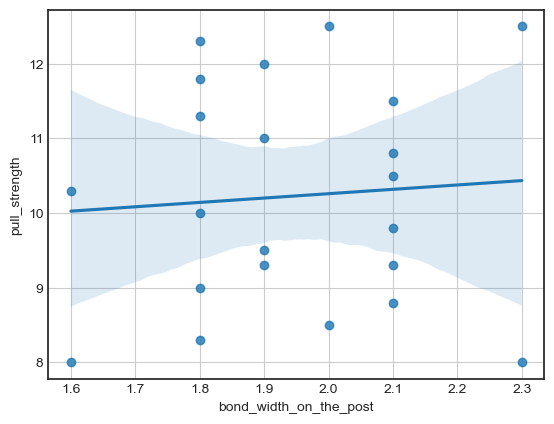

In [164]:
sn.regplot(x = wireDF.bond_width_on_the_post, y = wireDF.pull_strength)
plt.grid()

## Use the Model to make predictions about future wires

In [165]:
predData = pd.DataFrame({'die_height' : [5.5], 'post_height' : [19.3], 'loop_height' : [30.2], 'wire_length' : [90], 'bond_width_on_the_die' : [2], 'bond_width_on_the_post' : [1.85]})
predData = sm.add_constant(predData)
prediction = lm.predict(predData)
prediction

0    8.88975
dtype: float64

### Assignment Questions: 
#### a) Analyze this data to find which linear model is the best fit for this data (give details on how you decided which model is best).
Ordinary Least Squares is best here, as we can find linear relationships between 
the target variable and each of the feature variables. I used visualizations of the data to come to this conclusion


#### b) Report the amount of variation explained by the model you chose in part a).
.677 of the variation (about 68%) is explained by our model, as found by r^2


#### c) Find a 95% Confidence interval for each of the βj’s in your model, and interpret.
The confidence interval table printed below lists the lower bounds in the 0 column and the upper
bounds in the 1 column. We can be 95% confident that the values for each βj will be included in its 
respective interval (between the lower bound and upper bound). 



#### d) Holding all else fixed, how does a unit change in x4 change the average value of y?
A unit change in x4 (wire_length) will decrease the pull strength of the wire. It will decrease by a factor of about 0.22. 



#### e) For a specimen with x1 = 5.5, x2 = 19.3, x3 = 30.2, x4 = 90, x5 = 2, and x6 = 1.85 find the predicted value of y.
The predicted value for y is 8.88975 given those values (code for that prediction is above)

#### f) Check the model assumptions
The model assumes that there exists a linear relationship between the features and target. I can verify that this 
linear relationship exists after seeing the data visualized in scatter plots

In [166]:
#Get a 95% confidence interval
lm.conf_int(.05)

,0,1
Intercept,-11.883244,13.230595
die_height,-0.088842,0.233431
post_height,-0.587462,0.632592
loop_height,0.228599,0.891846
wire_length,-0.228725,0.033129
bond_width_on_the_die,-7.460726,5.417317
bond_width_on_the_post,-2.839084,4.254750
